### Preprocessing

In [235]:
import pandas as pd 
import numpy as np
import spacy
from tqdm import tqdm

from sklearn.cluster import DBSCAN

import plotly.express as px
import seaborn as sns

In [236]:
catalog = pd.read_csv("D:\Downloads\prod_desc.csv")

In [237]:
catalog

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."
...,...,...
495,496,Cap 2 bottoms - Cut loose from the maddening c...
496,497,Cap 2 crew - This crew takes the edge off fick...
497,498,All-time shell - No need to use that morning T...
498,499,All-wear cargo shorts - All-Wear Cargo Shorts ...


In [238]:
catalog.iloc[1,1]

'Active sport boxer briefs - Skinning up Glory requires enough movement without your boxers deciding to poach their own route. The form-fitting Active Sport Boxer Briefs are made from breathable 93% polyester (71% recycled) fabric that\'s fast-wicking, dries quickly and has 7% spandex for stretch; the seamless waistband and soft leg edges won\'t roll or bind. The gusseted, flat-sewn 6" inseam (size M) is offset to prevent inner-thigh chafe. Fly-free with a smooth front panel. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Stretch mesh provides support, open-weave mesh for airflow, wicks efficiently, dries fast"</li> <li>Seamless construction</li> <li>"Flat-sewn, gusseted inseam is set forward to prevent inner-thigh chafe"</li> <li>Fly-free support</li> <li>"Inseam (size M) is 6"""</li></ul><br><br><b>Fabric: </b>"4.6-oz 93% polyester (71% recycled)/7% spandex, with moisture-wicking performance. Recyclable through the Common Threads Recycling Pr

In [239]:
catalog["clean_documents"] =  catalog['description'].fillna('').apply(lambda x: x.lower())

catalog["clean_documents"] = catalog["clean_documents"].\
    apply(lambda x : 
    x.replace("<li>",'')\
    .replace("</li>",'')\
    .replace("<br>",'')\
    .replace("</br>",'')\
    .replace("<b>",'')\
    .replace("</b>",'')\
    .replace("<ul>",'')\
    .replace("</ul>",''))
                      
catalog["clean_documents"] = catalog["clean_documents"].str.replace(r"[^A-Za-z0-9]+", " ")

    
catalog.head()

,id,description,clean_documents
0,1,Active classic boxers - There's a reason why o...,active classic boxers - there's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs - skinning up glory ...
2,3,Active sport briefs - These superbreathable no...,active sport briefs - these superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc...","alpine guide pants - skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an...","alpine wind jkt - on high ridges, steep ice an..."


In [240]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [241]:
catalog["tokenized_documents"] = catalog["clean_documents"]\
                        .fillna('')\
                        .apply(lambda x : [token.lemma_ for token in nlp(x) if token.text not in STOP_WORDS])
catalog.head()

,id,description,clean_documents,tokenized_documents
0,1,Active classic boxers - There's a reason why o...,active classic boxers - there's a reason why o...,"[active, classic, boxer, -, reason, boxer, cul..."
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs - skinning up glory ...,"[active, sport, boxer, brief, -, skin, glory, ..."
2,3,Active sport briefs - These superbreathable no...,active sport briefs - these superbreathable no...,"[active, sport, brief, -, superbreathable, -, ..."
3,4,"Alpine guide pants - Skin in, climb ice, switc...","alpine guide pants - skin in, climb ice, switc...","[alpine, guide, pant, -, skin, ,, climb, ice, ..."
4,5,"Alpine wind jkt - On high ridges, steep ice an...","alpine wind jkt - on high ridges, steep ice an...","[alpine, wind, jkt, -, high, ridge, ,, steep, ..."


In [242]:
catalog["nlp_ready"] = catalog["tokenized_documents"].apply(lambda x : (' '.join(x)).strip())
catalog.head()

,id,description,clean_documents,tokenized_documents,nlp_ready
0,1,Active classic boxers - There's a reason why o...,active classic boxers - there's a reason why o...,"[active, classic, boxer, -, reason, boxer, cul...",active classic boxer - reason boxer cult favor...
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs - skinning up glory ...,"[active, sport, boxer, brief, -, skin, glory, ...",active sport boxer brief - skin glory require ...
2,3,Active sport briefs - These superbreathable no...,active sport briefs - these superbreathable no...,"[active, sport, brief, -, superbreathable, -, ...",active sport brief - superbreathable - fly bri...
3,4,"Alpine guide pants - Skin in, climb ice, switc...","alpine guide pants - skin in, climb ice, switc...","[alpine, guide, pant, -, skin, ,, climb, ice, ...","alpine guide pant - skin , climb ice , switch ..."
4,5,"Alpine wind jkt - On high ridges, steep ice an...","alpine wind jkt - on high ridges, steep ice an...","[alpine, wind, jkt, -, high, ridge, ,, steep, ...","alpine wind jkt - high ridge , steep ice alpin..."


In [244]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(catalog['nlp_ready'])

dense = X.toarray()
dense

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### DBSCAN

In [245]:
db = DBSCAN(eps=1, min_samples=180, metric="cosine")

db.fit(X)

DBSCAN(eps=1, metric='cosine', min_samples=180)

In [246]:
np.unique(db.labels_)

array([0], dtype=int64)

In [247]:
def count_val(val,T):
    c = 0
    for i in T:
        if i == val:
            c += 1
    return c

In [248]:
T_eps = np.arange(0.4,0.71,0.01)
T_min_samples = list(range(3,10))

for i in T_eps:
    for j in T_min_samples:
        dbscan = DBSCAN(eps=i, min_samples=j, metric="cosine")
        dbscan.fit(X)
        clusters = np.unique(dbscan.labels_)
        label = list(dbscan.labels_)
        outliers_percent = count_val(-1,label)/len(label)*100
        
        print(f"eps = {round(i,3)} - min_samples = {j} | {round(outliers_percent,2)}% outliers ({count_val(-1,label)}) ")
        print(f"{len(clusters)} clusters created")
        print("-"*50)

eps = 0.4 - min_samples = 3 | 68.4% outliers (342) 
32 clusters created
--------------------------------------------------
eps = 0.4 - min_samples = 4 | 76.0% outliers (380) 
21 clusters created
--------------------------------------------------
eps = 0.4 - min_samples = 5 | 83.2% outliers (416) 
12 clusters created
--------------------------------------------------
eps = 0.4 - min_samples = 6 | 87.2% outliers (436) 
9 clusters created
--------------------------------------------------
eps = 0.4 - min_samples = 7 | 89.6% outliers (448) 
7 clusters created
--------------------------------------------------
eps = 0.4 - min_samples = 8 | 95.4% outliers (477) 
3 clusters created
--------------------------------------------------
eps = 0.4 - min_samples = 9 | 97.0% outliers (485) 
2 clusters created
--------------------------------------------------
eps = 0.41 - min_samples = 3 | 66.6% outliers (333) 
34 clusters created
--------------------------------------------------
eps = 0.41 - min_sa

eps = 0.49 - min_samples = 9 | 86.0% outliers (430) 
5 clusters created
--------------------------------------------------
eps = 0.5 - min_samples = 3 | 49.6% outliers (248) 
38 clusters created
--------------------------------------------------
eps = 0.5 - min_samples = 4 | 56.6% outliers (283) 
27 clusters created
--------------------------------------------------
eps = 0.5 - min_samples = 5 | 66.2% outliers (331) 
15 clusters created
--------------------------------------------------
eps = 0.5 - min_samples = 6 | 70.6% outliers (353) 
11 clusters created
--------------------------------------------------
eps = 0.5 - min_samples = 7 | 74.4% outliers (372) 
8 clusters created
--------------------------------------------------
eps = 0.5 - min_samples = 8 | 78.2% outliers (391) 
8 clusters created
--------------------------------------------------
eps = 0.5 - min_samples = 9 | 80.6% outliers (403) 
7 clusters created
--------------------------------------------------
eps = 0.51 - min_sa

eps = 0.59 - min_samples = 8 | 64.4% outliers (322) 
12 clusters created
--------------------------------------------------
eps = 0.59 - min_samples = 9 | 72.8% outliers (364) 
7 clusters created
--------------------------------------------------
eps = 0.6 - min_samples = 3 | 28.0% outliers (140) 
42 clusters created
--------------------------------------------------
eps = 0.6 - min_samples = 4 | 35.2% outliers (176) 
33 clusters created
--------------------------------------------------
eps = 0.6 - min_samples = 5 | 45.0% outliers (225) 
23 clusters created
--------------------------------------------------
eps = 0.6 - min_samples = 6 | 55.2% outliers (276) 
16 clusters created
--------------------------------------------------
eps = 0.6 - min_samples = 7 | 57.6% outliers (288) 
15 clusters created
--------------------------------------------------
eps = 0.6 - min_samples = 8 | 62.8% outliers (314) 
12 clusters created
--------------------------------------------------
eps = 0.6 - min

eps = 0.69 - min_samples = 8 | 34.2% outliers (171) 
13 clusters created
--------------------------------------------------
eps = 0.69 - min_samples = 9 | 42.8% outliers (214) 
8 clusters created
--------------------------------------------------
eps = 0.7 - min_samples = 3 | 8.2% outliers (41) 
18 clusters created
--------------------------------------------------
eps = 0.7 - min_samples = 4 | 11.0% outliers (55) 
18 clusters created
--------------------------------------------------
eps = 0.7 - min_samples = 5 | 16.2% outliers (81) 
14 clusters created
--------------------------------------------------
eps = 0.7 - min_samples = 6 | 19.8% outliers (99) 
14 clusters created
--------------------------------------------------
eps = 0.7 - min_samples = 7 | 21.4% outliers (107) 
14 clusters created
--------------------------------------------------
eps = 0.7 - min_samples = 8 | 30.4% outliers (152) 
14 clusters created
--------------------------------------------------
eps = 0.7 - min_samp

The best hyperparameters with less outliers is eps=0.7 and min_samples=3 

In [249]:
db = DBSCAN(eps=0.7, min_samples=3, metric="cosine")
db.fit(X)
np.unique(db.labels_,return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16], dtype=int64),
 array([ 41,  64, 187,  28,  22,  10,  22,  56,   8,   4,   7,  24,   4,
          5,   7,   3,   4,   4], dtype=int64))

In [250]:
clusters=db.labels_
from sklearn import metrics
score = metrics.silhouette_score(X, clusters)
print(score)

0.07549428251187859


In [251]:
catalog["dbscan_cluster"] = dbscan.labels_
catalog.head()

,id,description,clean_documents,tokenized_documents,nlp_ready,dbscan_cluster
0,1,Active classic boxers - There's a reason why o...,active classic boxers - there's a reason why o...,"[active, classic, boxer, -, reason, boxer, cul...",active classic boxer - reason boxer cult favor...,3
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs - skinning up glory ...,"[active, sport, boxer, brief, -, skin, glory, ...",active sport boxer brief - skin glory require ...,-1
2,3,Active sport briefs - These superbreathable no...,active sport briefs - these superbreathable no...,"[active, sport, brief, -, superbreathable, -, ...",active sport brief - superbreathable - fly bri...,-1
3,4,"Alpine guide pants - Skin in, climb ice, switc...","alpine guide pants - skin in, climb ice, switc...","[alpine, guide, pant, -, skin, ,, climb, ice, ...","alpine guide pant - skin , climb ice , switch ...",0
4,5,"Alpine wind jkt - On high ridges, steep ice an...","alpine wind jkt - on high ridges, steep ice an...","[alpine, wind, jkt, -, high, ridge, ,, steep, ...","alpine wind jkt - high ridge , steep ice alpin...",0


# KMeans

In [252]:
wcss =  []
k = []
sil = []
N = 50

for i in range (2,N+1): 
    kmeans = KMeans(n_clusters= i, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    sil.append(silhouette_score(X, kmeans.predict(X)))
    k.append(i)

D:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

D:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

In [253]:
kmeans = pd.DataFrame({"k":k,"wcss":wcss,"sil":sil})

In [254]:
fig = px.line(kmeans, x="k", y="wcss",markers=True)
fig.update_traces(textposition="bottom right")
fig.show(renderer="iframe") # if using workspace

In [255]:
fig = px.bar(data_frame=kmeans, x=k, y=sil)

fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster"
)

fig.show(renderer="iframe") 

In [256]:
kmeans = KMeans(n_clusters= 41, random_state = 42)
kmeans.fit(X)

D:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=41, random_state=42)

In [257]:
catalog["kmeans_cluster"] = kmeans.labels_
catalog.head()

,id,description,clean_documents,tokenized_documents,nlp_ready,dbscan_cluster,kmeans_cluster
0,1,Active classic boxers - There's a reason why o...,active classic boxers - there's a reason why o...,"[active, classic, boxer, -, reason, boxer, cul...",active classic boxer - reason boxer cult favor...,3,24
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs - skinning up glory ...,"[active, sport, boxer, brief, -, skin, glory, ...",active sport boxer brief - skin glory require ...,-1,0
2,3,Active sport briefs - These superbreathable no...,active sport briefs - these superbreathable no...,"[active, sport, brief, -, superbreathable, -, ...",active sport brief - superbreathable - fly bri...,-1,25
3,4,"Alpine guide pants - Skin in, climb ice, switc...","alpine guide pants - skin in, climb ice, switc...","[alpine, guide, pant, -, skin, ,, climb, ice, ...","alpine guide pant - skin , climb ice , switch ...",0,7
4,5,"Alpine wind jkt - On high ridges, steep ice an...","alpine wind jkt - on high ridges, steep ice an...","[alpine, wind, jkt, -, high, ridge, ,, steep, ...","alpine wind jkt - high ridge , steep ice alpin...",0,18


In [258]:
silhouette_db = silhouette_score(X, catalog['dbscan_cluster'])
print("Silhouette score for DBSCAN:", silhouette_db)

# Silhouette score for KMeans
silhouette_kmeans = silhouette_score(X, catalog['kmeans_cluster'])
print("Silhouette score for KMeans:", silhouette_kmeans)

Silhouette score for DBSCAN: 0.05073804549943108
Silhouette score for KMeans: 0.11836405514804428


# KMeans provdes better silhouette score than DBSCAN. So we went ahead with KMeans

In [259]:
catalog[catalog["kmeans_cluster"]==10]

,id,description,clean_documents,tokenized_documents,nlp_ready,dbscan_cluster,kmeans_cluster
107,108,Reg fit organic ctn jeans-long - 100% organic ...,reg fit organic ctn jeans-long - 100% organic ...,"[reg, fit, organic, ctn, jean, -, long, -, 100...",reg fit organic ctn jean - long - 100 % organi...,0,10
108,109,Reg fit organic ctn jeans-reg - 100% organic c...,reg fit organic ctn jeans-reg - 100% organic c...,"[reg, fit, organic, ctn, jean, -, reg, -, 100,...",reg fit organic ctn jean - reg - 100 % organic...,0,10
109,110,Relax fit organic ctn jeans-shor - The everyda...,relax fit organic ctn jeans-shor - the everyda...,"[relax, fit, organic, ctn, jean, -, shor, -, e...","relax fit organic ctn jean - shor - everyday ,...",0,10
117,118,Shop pants - reg - More at home under the truc...,shop pants - reg - more at home under the truc...,"[shop, pant, -, reg, -, home, truck, inside, ,...","shop pant - reg - home truck inside , shop pan...",0,10
118,119,Shop pants - short - More at home under the tr...,shop pants - short - more at home under the tr...,"[shop, pant, -, short, -, home, truck, inside,...","shop pant - short - home truck inside , shop p...",0,10
185,186,Inga shorts - Long rides continue after the se...,inga shorts - long rides continue after the se...,"[inga, short, -, long, ride, continue, session...",inga short - long ride continue session inga s...,0,10
293,294,Inga shortie - Short boards and short shorts l...,inga shortie - short boards and short shorts l...,"[inga, shortie, -, short, board, short, short,...",inga shortie - short board short short liven s...,0,10
349,350,Shop pants - long - More at home under the tru...,shop pants - long - more at home under the tru...,"[shop, pant, -, long, -, home, truck, inside, ...","shop pant - long - home truck inside , shop pa...",0,10
389,390,Reg fit organic ctn jeans-short - 100% organic...,reg fit organic ctn jeans-short - 100% organic...,"[reg, fit, organic, ctn, jean, -, short, -, 10...",reg fit organic ctn jean - short - 100 % organ...,0,10
390,391,Relax fit organic ctn jeans-long - The everyda...,relax fit organic ctn jeans-long - the everyda...,"[relax, fit, organic, ctn, jean, -, long, -, e...","relax fit organic ctn jean - long - everyday ,...",0,10


Create a DF per cluster

In [260]:
d_cluster = {}

for i in range(-1,19):
    d_cluster[i]=catalog[catalog["kmeans_cluster"]==i].reset_index(drop=True)

d_cluster[10]

,id,description,clean_documents,tokenized_documents,nlp_ready,dbscan_cluster,kmeans_cluster
0,108,Reg fit organic ctn jeans-long - 100% organic ...,reg fit organic ctn jeans-long - 100% organic ...,"[reg, fit, organic, ctn, jean, -, long, -, 100...",reg fit organic ctn jean - long - 100 % organi...,0,10
1,109,Reg fit organic ctn jeans-reg - 100% organic c...,reg fit organic ctn jeans-reg - 100% organic c...,"[reg, fit, organic, ctn, jean, -, reg, -, 100,...",reg fit organic ctn jean - reg - 100 % organic...,0,10
2,110,Relax fit organic ctn jeans-shor - The everyda...,relax fit organic ctn jeans-shor - the everyda...,"[relax, fit, organic, ctn, jean, -, shor, -, e...","relax fit organic ctn jean - shor - everyday ,...",0,10
3,118,Shop pants - reg - More at home under the truc...,shop pants - reg - more at home under the truc...,"[shop, pant, -, reg, -, home, truck, inside, ,...","shop pant - reg - home truck inside , shop pan...",0,10
4,119,Shop pants - short - More at home under the tr...,shop pants - short - more at home under the tr...,"[shop, pant, -, short, -, home, truck, inside,...","shop pant - short - home truck inside , shop p...",0,10
5,186,Inga shorts - Long rides continue after the se...,inga shorts - long rides continue after the se...,"[inga, short, -, long, ride, continue, session...",inga short - long ride continue session inga s...,0,10
6,294,Inga shortie - Short boards and short shorts l...,inga shortie - short boards and short shorts l...,"[inga, shortie, -, short, board, short, short,...",inga shortie - short board short short liven s...,0,10
7,350,Shop pants - long - More at home under the tru...,shop pants - long - more at home under the tru...,"[shop, pant, -, long, -, home, truck, inside, ...","shop pant - long - home truck inside , shop pa...",0,10
8,390,Reg fit organic ctn jeans-short - 100% organic...,reg fit organic ctn jeans-short - 100% organic...,"[reg, fit, organic, ctn, jean, -, short, -, 10...",reg fit organic ctn jean - short - 100 % organ...,0,10
9,391,Relax fit organic ctn jeans-long - The everyda...,relax fit organic ctn jeans-long - the everyda...,"[relax, fit, organic, ctn, jean, -, long, -, e...","relax fit organic ctn jean - long - everyday ,...",0,10


Create a wordcloud per cluster

Cluster No. 1


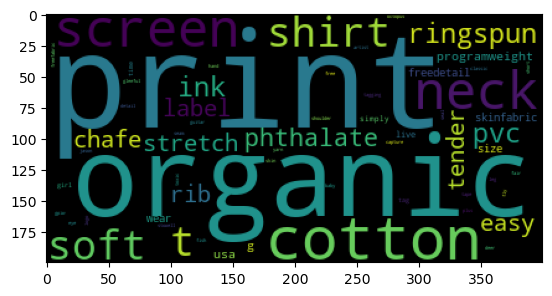

Cluster No. 2


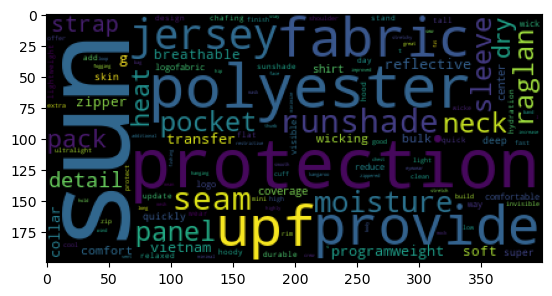

Cluster No. 3


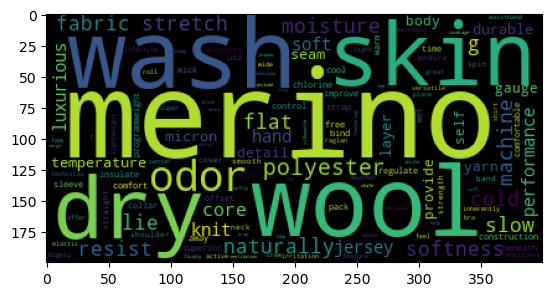

Cluster No. 4


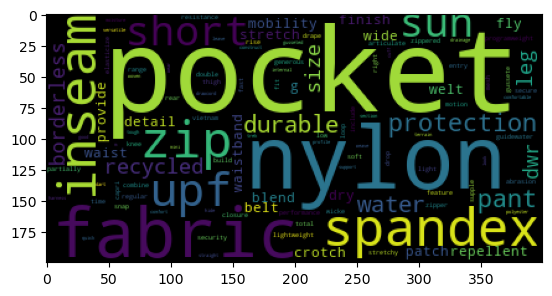

Cluster No. 5


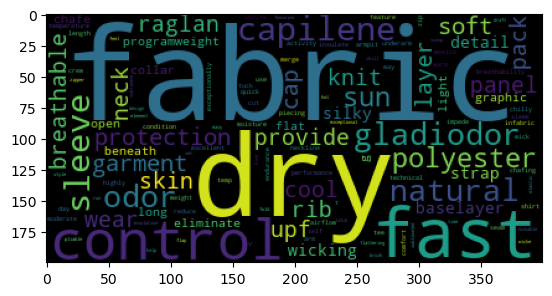

Cluster No. 6


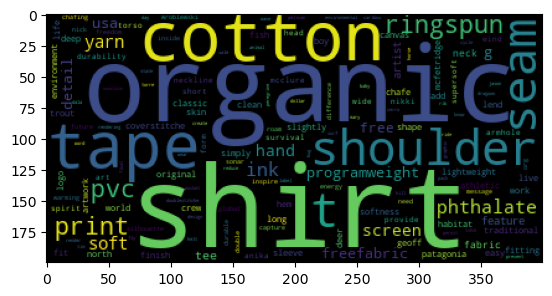

Cluster No. 7


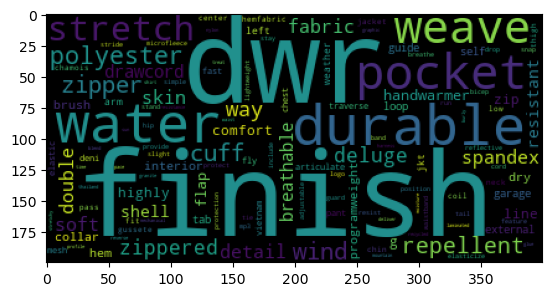

Cluster No. 8


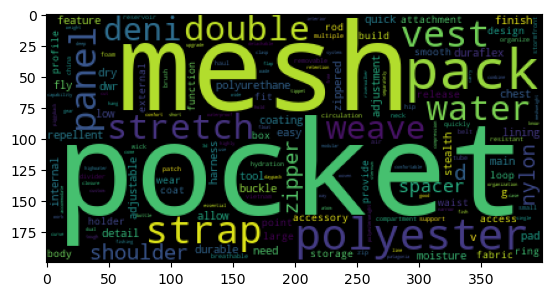

Cluster No. 9


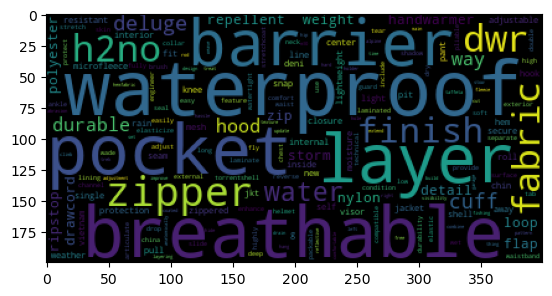

In [261]:
for i in range(1,10):
    lst=d_cluster[i]["nlp_ready"].to_list()
    flat_item=' '.join(lst)
    print("Cluster No.",i)
    wd = WordCloud(stopwords=STOP_WORDS,collocations=False)
    cloud = wd.generate(flat_item)
    plt.imshow(cloud)
    plt.show()

### Recommendation system


In [262]:
def find_similar_items(product_id):
    """
    Return 5 product ids belonging to the same cluster as item_id
    """
    cluster_id = int(catalog.loc[catalog["id"] == product_id,'kmeans_cluster'])
    similar_items = catalog.loc[catalog["kmeans_cluster"] == cluster_id,:].loc[catalog["id"] != product_id,:]["id"]
    sample = similar_items.sample(min(5,len(similar_items))) # security if 5 is greater than the max
    return sample

In [263]:
def reco_system():
    product_id = int(input("What product would you like to buy ? "))

    print()
    try:
        item_desc = catalog.loc[catalog['id']==product_id, 'clean_documents'].values[0]
    except:
        print('Product not found in database. Please enter a valid product id.')
    else:
        print(f"Product found in database, description below :")
        print(item_desc)
        print()

        print(f"You might also be interested by the following products : ")
        print()

        for i in find_similar_items(product_id):
            print(f"Item #", i)
            print(catalog.loc[catalog['id']==i, 'clean_documents'].values[0])
            print('-'*50)

In [274]:
reco_system()

What product would you like to buy ? 5

Product found in database, description below :
alpine wind jkt - on high ridges, steep ice and anything alpine, this jacket serves as a true "best of all worlds" staple. it excels as a stand-alone shell for blustery rock climbs, cool-weather trail runs and high-output ski tours. and then, when conditions have you ice and alpine climbing, it functions as a lightly insulated windshirt on the approach, as well as a frictionless midlayer when it's time to bundle up and tie-in. the polyester ripstop shell with a deluge dwr (durable water repellent) treatment sheds snow and blocks wind, while the smooth, lightly brushed hanging mesh liner wicks moisture, dries fast, and doesn't bind to your baselayers. superlight stretch-woven underarm panels enhance breathability and allow for unimpaired arm motion, and the two hand pockets close with zippers. a drawcord hem, elastic cuffs, a heat-transfer reflective logo and a regular-coil, center-front zipper with d

C:\Users\Mudde\AppData\Local\Temp\ipykernel_15972\1703615772.py:5: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



### SVD

In [265]:
# TruncatedSVD from sklearn
from sklearn.decomposition import TruncatedSVD

In [266]:
dense

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [267]:
vectorizer.vocabulary_

{'active': 319,
 'classic': 818,
 'boxer': 633,
 'reason': 2752,
 'cult': 1035,
 'favorite': 1408,
 'cool': 959,
 'especially': 1334,
 'sticky': 3280,
 'situation': 3101,
 'quick': 2709,
 'dry': 1219,
 'lightweight': 2061,
 'underwear': 3668,
 'minimal': 2236,
 'space': 3202,
 'travel': 3586,
 'pack': 2448,
 'expose': 1367,
 'brush': 665,
 'waistband': 3786,
 'offer': 2386,
 'skin': 3112,
 'softness': 3180,
 'panel': 2468,
 'construction': 935,
 'traditional': 3570,
 'fit': 1456,
 'functional': 1565,
 'fly': 1503,
 '100': 3,
 'recycle': 2760,
 'polyester': 2600,
 'moisture': 2262,
 'wicke': 3866,
 'performance': 2524,
 'inseam': 1883,
 'size': 3102,
 'thread': 3504,
 'program': 2658,
 'silky': 3080,
 'capilene': 725,
 'fabric': 1384,
 'ultralight': 3648,
 'breathable': 642,
 'elastic': 1267,
 'comfort': 882,
 'gladiodor': 1607,
 'natural': 2312,
 'odor': 2385,
 'control': 949,
 'garment': 1580,
 'programweight': 2660,
 '99': 294,
 'oz': 2445,
 'mexico': 2205,
 'sport': 3227,
 'brief': 

In [268]:
svd_model = TruncatedSVD(n_components=15, algorithm='randomized',random_state=122)
lsa = svd_model.fit_transform(X)

topic_encoded_df = pd.DataFrame(lsa, columns = [f"topic_{i}" for i in range(len(lsa[0]))])
topic_encoded_df["documents"] = catalog['clean_documents']

topic_encoded_df.head(3)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,documents
0,0.254368,-0.048457,0.186109,0.079333,-0.124193,-0.015025,-0.045512,-0.032078,-0.143735,0.047001,0.000634,0.036199,0.049939,0.027308,0.038711,active classic boxers - there's a reason why o...
1,0.263908,-0.074964,0.101777,0.097923,-0.030702,0.087509,-0.055816,-0.031384,-0.138312,-0.048295,-0.040141,0.177507,-0.009287,0.064457,-0.028708,active sport boxer briefs - skinning up glory ...
2,0.238223,-0.093284,0.107353,0.020145,-0.029418,0.092321,0.007608,0.046380,-0.081098,-0.011711,-0.042994,0.206832,-0.076280,0.079859,-0.023887,active sport briefs - these superbreathable no...


In [269]:
topic_encoded_df["main_topic"] = [np.argmax(topic) for topic in lsa]
topic_encoded_df["main_topic"].value_counts()

main_topic
0     254
1      61
2      38
5      25
7      24
3      21
8      20
6      17
4      13
10      8
11      8
14      7
9       3
13      1
Name: count, dtype: int64

<Axes: xlabel='main_topic', ylabel='count'>

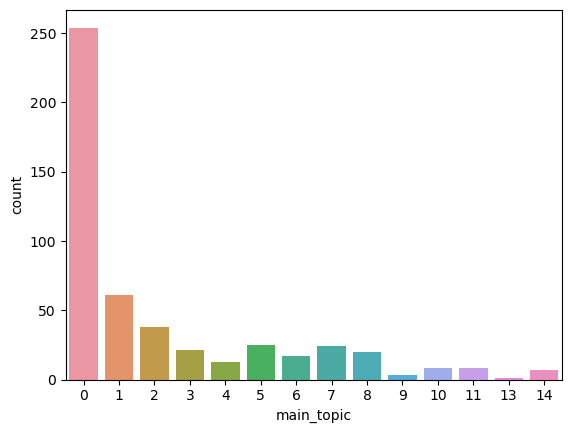

In [270]:
sns.countplot(data=topic_encoded_df,x="main_topic")

In [271]:
topics_description = pd.DataFrame(svd_model.components_, columns = vectorizer.get_feature_names_out(), 
                                  index = ['topic_' + str(i) for i in range(svd_model.components_.shape[0])])

# Compute absolute values of coefficients
topics_description = topics_description.apply(np.abs, axis = 1)

# Each word is map with a score of relevance for each topic
topics_description.head()

,000,03,10,100,1000,1021,1027,103,1038,1055,...,zinger,zip,zipped,zipper,zippered,zippers,zippersfabric,zipping,zips,zone
topic_0,0.002717,0.000603,0.051793,0.137506,0.000472,0.000381,0.000273,0.011079,0.000491,0.000226,...,0.000665,0.089704,0.001026,0.094591,0.076134,0.001562,0.000970,0.002027,0.008028,0.008350
topic_1,0.000631,0.000698,0.005277,0.066965,0.000392,0.000401,0.000240,0.022520,0.000503,0.000250,...,0.000665,0.049073,0.000996,0.091068,0.072352,0.002044,0.001130,0.002472,0.009006,0.010019
topic_2,0.001276,0.000714,0.045709,0.012580,0.000450,0.000335,0.000092,0.000155,0.000537,0.000114,...,0.000752,0.066390,0.000444,0.046479,0.065618,0.001847,0.000903,0.001950,0.006983,0.001682
topic_3,0.003925,0.001401,0.089035,0.052031,0.001081,0.000647,0.000079,0.003916,0.001190,0.000190,...,0.000671,0.085727,0.000941,0.117159,0.061763,0.004325,0.002150,0.004943,0.015712,0.015964
topic_4,0.002128,0.000461,0.007505,0.061953,0.000393,0.000054,0.000045,0.000665,0.000243,0.000199,...,0.000255,0.026395,0.000119,0.008770,0.014839,0.000959,0.000534,0.000881,0.002396,0.018605


In [275]:
print("Let's see what the topics are formed of. \n")

for i,row in topics_description.iterrows():
    print(f" {i}")
    print(row.sort_values(ascending=False)[0:5].index.tolist())
    print()

Let's see what the topics are formed of. 

 topic_0
['pocket', 'recycle', 'organic', 'cotton', 'polyester']

 topic_1
['organic', 'shirt', 'cotton', 'ringspun', 'print']

 topic_2
['merino', 'odor', 'pocket', 'wool', 'control']

 topic_3
['organic', 'inseam', 'cotton', 'button', '32']

 topic_4
['merino', 'wool', 'wash', 'sun', 'gladiodor']

 topic_5
['82', 'nylon', 'coverage', '18', 'organic']

 topic_6
['cotton', 'organic', '82', 'tencel', 'upf']

 topic_7
['waterproof', 'strap', 'barrier', 'h2no', 'deni']

 topic_8
['sun', 'protection', 'upf', '30', 'collar']

 topic_9
['fleece', 'waterproof', 'strap', 'wind', 'barrier']

 topic_10
['photo', 'poster', 'outside', 'fleece', 'tribute']

 topic_11
['82', '18', 'coverage', 'microfiber', 'spandex']

 topic_12
['fleece', 'r1', 'weave', 'dwr', 'tencel']

 topic_13
['fleece', 'heat', 'reflective', 'transfer', 'denim']

 topic_14
['microfiber', 'sock', 'construction', 'toe', 'knit']



-------------------------

TOPIC :  topic_0


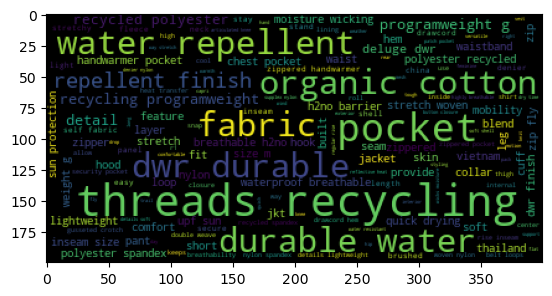


-------------------------

TOPIC :  topic_1


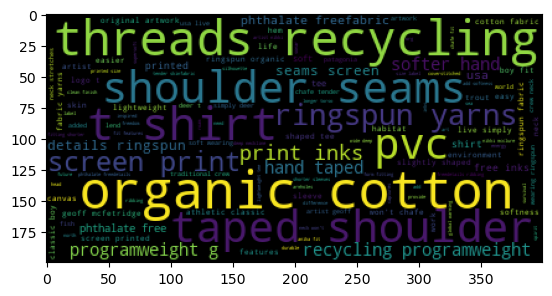


-------------------------

TOPIC :  topic_2


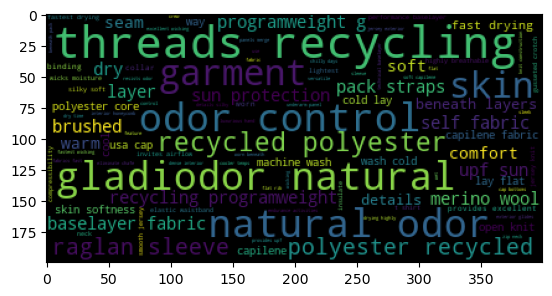


-------------------------

TOPIC :  topic_3


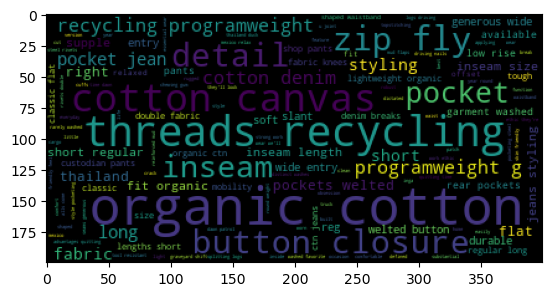


-------------------------

TOPIC :  topic_4


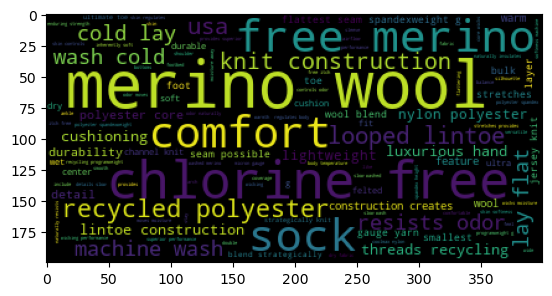


-------------------------

TOPIC :  topic_5


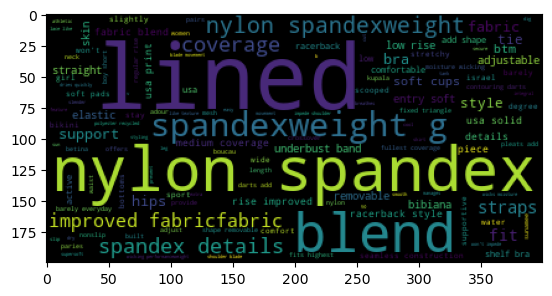


-------------------------

TOPIC :  topic_6


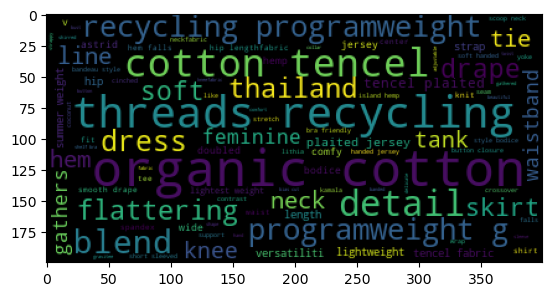


-------------------------

TOPIC :  topic_7


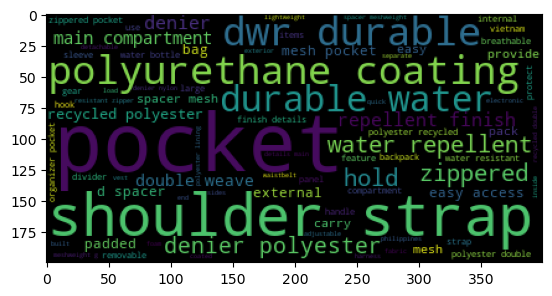


-------------------------

TOPIC :  topic_8


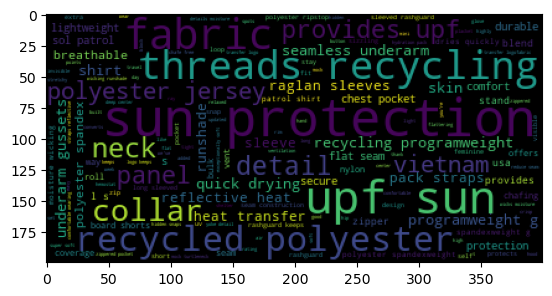


-------------------------

TOPIC :  topic_9


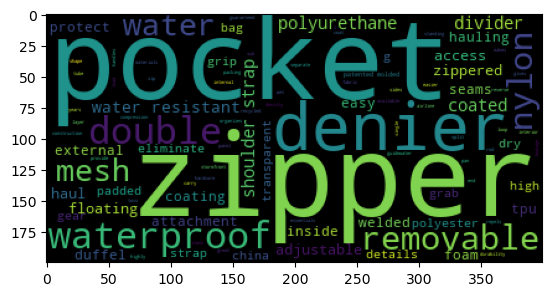


-------------------------

TOPIC :  topic_10


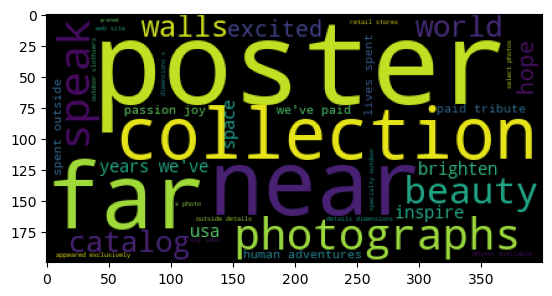


-------------------------

TOPIC :  topic_11


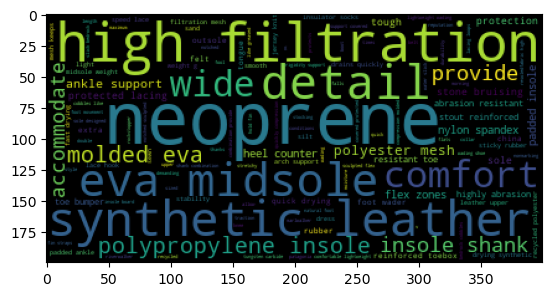


-------------------------

TOPIC :  topic_12
cannot create wordcloud for this topic
-------------------------

TOPIC :  topic_13


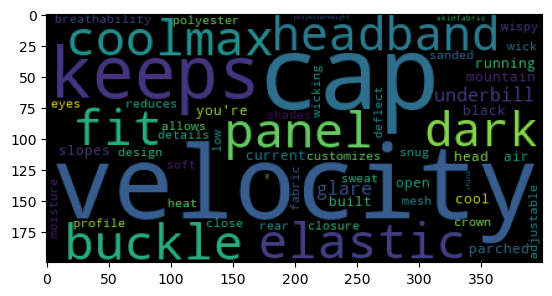


-------------------------

TOPIC :  topic_14


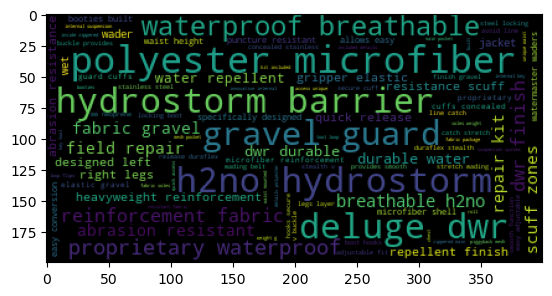

In [273]:
wd = WordCloud(stopwords=STOP_WORDS)

cols = [f'topic_{i}' for i in range(len(lsa[0]))]

for i in range(len(cols)):
    print('-------------------------')
    print()
    print('TOPIC : ', cols[i])
    
    # Handle topics that are not main topics for any document in the corpus
    if (topic_encoded_df['main_topic']==i).any() == False :
        print('cannot create wordcloud for this topic')
        continue
    
    texts = " ".join(topic_encoded_df.loc[topic_encoded_df['main_topic']==i,'documents'])
    cloud = wd.generate(texts)
    plt.imshow(cloud)
    plt.show()
    
    print()